In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy.stats import mode
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [14]:
data = pd.read_csv('D:\Training.csv').dropna(axis=1)
data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [33]:
data.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,...,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000
mean,0.137805,0.159756,0.021951,0.045122,0.021951,0.162195,0.139024,0.045122,0.045122,0.021951,...,0.021951,0.021951,0.021951,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171
std,0.344730,0.366417,0.146539,0.207593,0.146539,0.368667,0.346007,0.207593,0.207593,0.146539,...,0.146539,0.146539,0.146539,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
data.isnull().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

In [16]:
data.columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis'],
      dtype='object', length=133)

In [18]:
disease_counts = data['prognosis'].value_counts()
disease_counts

Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
Allergy      

In [20]:
disease_counts.index,disease_counts.values

(Index(['Fungal infection', 'Hepatitis C', 'Hepatitis E', 'Alcoholic hepatitis',
        'Tuberculosis', 'Common Cold', 'Pneumonia',
        'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
        'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia', 'Osteoarthristis',
        'Arthritis', '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
        'Urinary tract infection', 'Psoriasis', 'Hepatitis D', 'Hepatitis B',
        'Allergy', 'hepatitis A', 'GERD', 'Chronic cholestasis',
        'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
        'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
        'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
        'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'Impetigo'],
       dtype='object'),
 array([120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120,
        120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120,
        120, 120, 120, 120, 120, 120, 1

In [22]:
temp_df = pd.DataFrame({"Disease": disease_counts.index,"Counts": disease_counts.values})
temp_df.head()

,Disease,Counts
0,Fungal infection,120
1,Hepatitis C,120
2,Hepatitis E,120
3,Alcoholic hepatitis,120
4,Tuberculosis,120


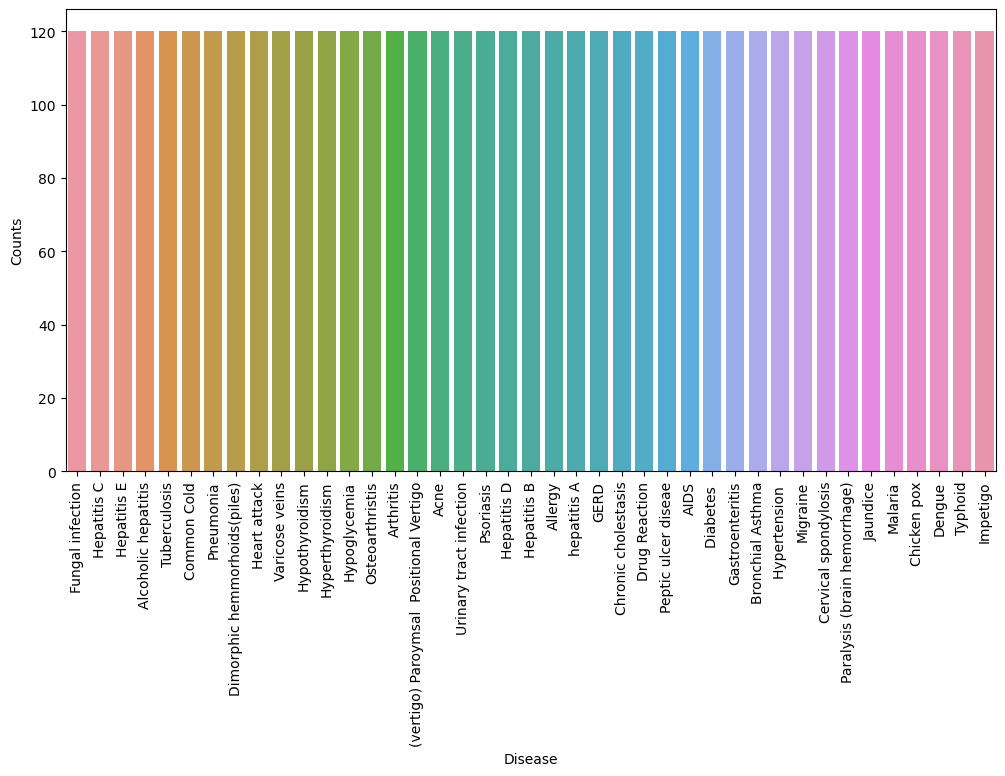

In [28]:
plt.figure(figsize=(12,6))
sns.barplot(x = 'Disease',y='Counts',data=temp_df)
plt.xticks(rotation=90)
plt.show()


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 5.0+ MB


In [34]:
data.dtypes

itching                  int64
skin_rash                int64
nodal_skin_eruptions     int64
continuous_sneezing      int64
shivering                int64
                         ...  
inflammatory_nails       int64
blister                  int64
red_sore_around_nose     int64
yellow_crust_ooze        int64
prognosis               object
Length: 133, dtype: object

In [36]:
len(data.select_dtypes(include='object'))

4920

In [40]:
data.columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis'],
      dtype='object', length=133)

In [45]:
data.dtypes == 'object'

itching                 False
skin_rash               False
nodal_skin_eruptions    False
continuous_sneezing     False
shivering               False
                        ...  
inflammatory_nails      False
blister                 False
red_sore_around_nose    False
yellow_crust_ooze       False
prognosis                True
Length: 133, dtype: bool

In [46]:
data.shape

(4920, 133)

In [47]:
data.dtypes[data.dtypes == 'object']

prognosis    object
dtype: object

In [48]:
encoder = LabelEncoder()
data['prognosis'] = encoder.fit_transform(data['prognosis'])

In [49]:
data['prognosis']

0       15
1       15
2       15
3       15
4       15
        ..
4915     0
4916     2
4917    38
4918    35
4919    27
Name: prognosis, Length: 4920, dtype: int32

In [50]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size = 0.2, random_state = 24)
print(f"Train: {X_train.shape}, {y_train.shape}")
print(f"Test: {X_test.shape}, {y_test.shape}")

Train: (3936, 132), (3936,)
Test: (984, 132), (984,)


In [52]:
def cv_scoring(estimator,X,y):
    return accuracy_score(y,estimator.predict(X))

models = {'SVM':SVC(),
         "Gaussian NB":GaussianNB(),
         "Random Forest":RandomForestClassifier(random_state=18)}

for model_name in models:
    
    model = models[model_name]
    
    scores = cross_val_score(model, X, y, cv = 10, n_jobs = -1, scoring = cv_scoring)
    
    print("=="*30)
    print(model_name)
    print(f"Scores: {scores}")
    print(f"Mean Score: {np.mean(scores)}")

SVM
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
Gaussian NB
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
Random Forest
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0


Accuracy on train data by SVM Classifier\: 100.0
Accuracy on test data by SVM Classifier\: 100.0


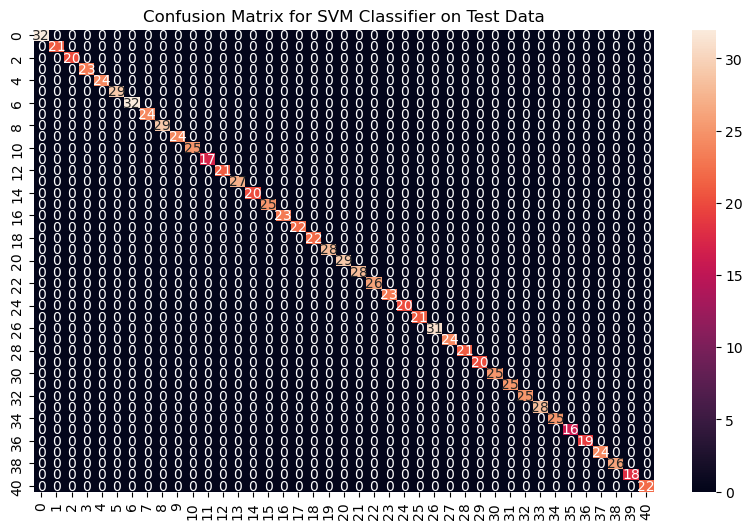

Accuracy on train data by Naive Bayes Classifier\: 100.0
Accuracy on test data by Naive Bayes Classifier\: 100.0


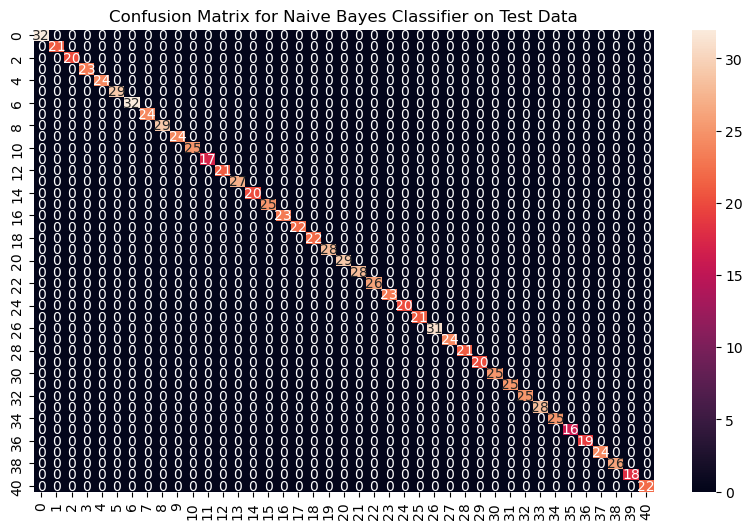

Accuracy on train data by Random Forest Classifier\: 100.0
Accuracy on test data by Random Forest Classifier\: 100.0


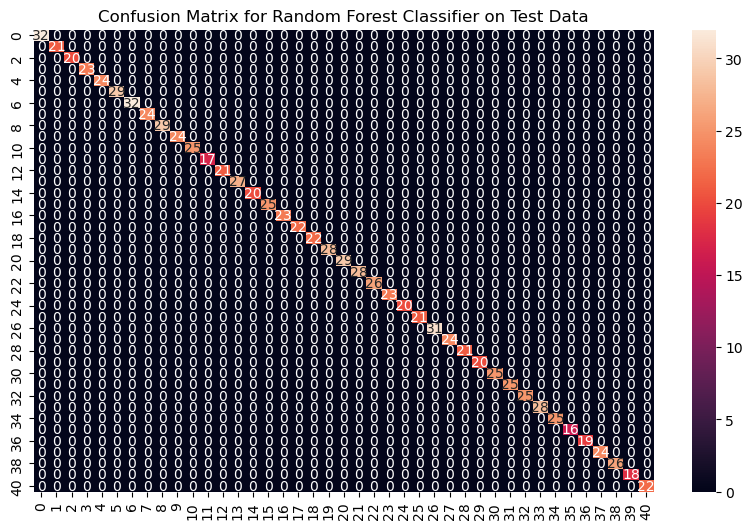

In [56]:
svm_model = SVC()
svm_model.fit(X_train,y_train)
preds = svm_model.predict(X_test)

print(f"Accuracy on train data by SVM Classifier\: {accuracy_score(y_train, svm_model.predict(X_train))*100}")
print(f"Accuracy on test data by SVM Classifier\: {accuracy_score(y_test, preds)*100}")

cf_matrix = confusion_matrix(y_test,preds)
plt.figure(figsize=(10,6))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for SVM Classifier on Test Data")
plt.show()

nb_model = GaussianNB()
nb_model.fit(X_train,y_train)
preds = nb_model.predict(X_test)

print(f"Accuracy on train data by Naive Bayes Classifier\: {accuracy_score(y_train, nb_model.predict(X_train))*100}")
print(f"Accuracy on test data by Naive Bayes Classifier\: {accuracy_score(y_test, preds)*100}")

cf_matrix = confusion_matrix(y_test,preds)
plt.figure(figsize=(10,6))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Naive Bayes Classifier on Test Data")
plt.show()

rf_model = RandomForestClassifier(random_state=18)
rf_model.fit(X_train, y_train)
preds = rf_model.predict(X_test)

print(f"Accuracy on train data by Random Forest Classifier\: {accuracy_score(y_train, rf_model.predict(X_train))*100}")
print(f"Accuracy on test data by Random Forest Classifier\: {accuracy_score(y_test, preds)*100}")
 
cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(10,6))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Random Forest Classifier on Test Data")
plt.show()

C:\Users\Mostafa\AppData\Local\Temp\ipykernel_20600\448050688.py:17: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  final_preds = [mode([i,j,k])[0][0] for i,j,k in zip(svm_preds, nb_preds, rf_preds)]


Accuracy on Test dataset by the combined model: 100.0


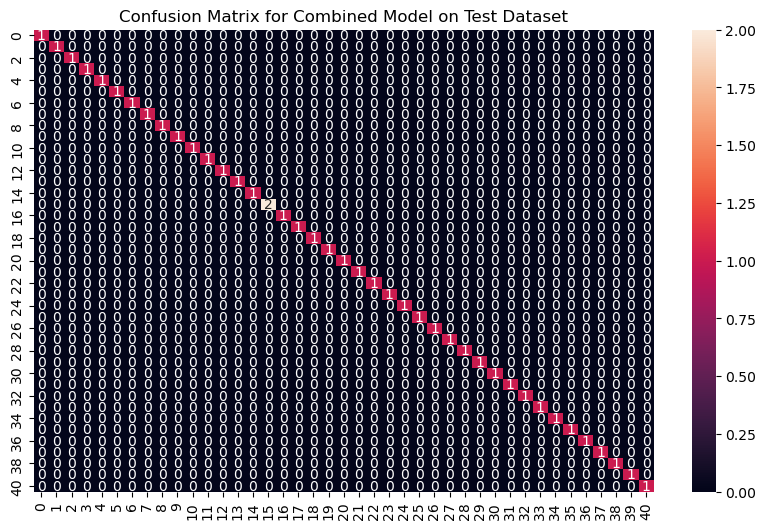

In [67]:
final_svm_model = SVC()
final_nb_model = GaussianNB()
final_rf_model = RandomForestClassifier(random_state=18)
final_svm_model.fit(X, y)
final_nb_model.fit(X, y)
final_rf_model.fit(X, y)

test_data = pd.read_csv("D:\Testing.csv").dropna(axis=1)
#test_data.head()
test_X = test_data.iloc[:,:-1]
#test_X.shape
test_Y = encoder.transform(test_data.iloc[:, -1])
svm_preds = final_svm_model.predict(test_X)
nb_preds = final_nb_model.predict(test_X)
rf_preds = final_rf_model.predict(test_X)

final_preds = [mode([i,j,k])[0][0] for i,j,k in zip(svm_preds, nb_preds, rf_preds)]

print(f"Accuracy on Test dataset by the combined model\
: {accuracy_score(test_Y, final_preds)*100}")
 
cf_matrix = confusion_matrix(test_Y, final_preds)
plt.figure(figsize=(10,6))
           
sns.heatmap(cf_matrix, annot = True)
plt.title("Confusion Matrix for Combined Model on Test Dataset")
plt.show()

In [82]:
X.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
X.columns.values

array(['itching', 'skin_rash', 'nodal_skin_eruptions',
       'continuous_sneezing', 'shivering', 'chills', 'joint_pain',
       'stomach_pain', 'acidity', 'ulcers_on_tongue', 'muscle_wasting',
       'vomiting', 'burning_micturition', 'spotting_ urination',
       'fatigue', 'weight_gain', 'anxiety', 'cold_hands_and_feets',
       'mood_swings', 'weight_loss', 'restlessness', 'lethargy',
       'patches_in_throat', 'irregular_sugar_level', 'cough',
       'high_fever', 'sunken_eyes', 'breathlessness', 'sweating',
       'dehydration', 'indigestion', 'headache', 'yellowish_skin',
       'dark_urine', 'nausea', 'loss_of_appetite', 'pain_behind_the_eyes',
       'back_pain', 'constipation', 'abdominal_pain', 'diarrhoea',
       'mild_fever', 'yellow_urine', 'yellowing_of_eyes',
       'acute_liver_failure', 'fluid_overload', 'swelling_of_stomach',
       'swelled_lymph_nodes', 'malaise', 'blurred_and_distorted_vision',
       'phlegm', 'throat_irritation', 'redness_of_eyes', 'sinus_press

In [74]:
symptoms = X.columns.values
symptom_index = {}

In [ ]:
for index,value in enumerate(symptom):
    symptom = " ".join([i.capitalize() for i in value.split("_")])
    symptom_index[symptom] = index
    data_dict = {"symptom_index":symptom_index,
                 "predictions_classes":encoder.classes_}

In [ ]:
symptoms = X.columns.values
symptom_index = {}

for index,value in enumerate(symptoms):
    symptom = " ".join([i.capitalize() for i in value.split("_")])
    symptom_index[symptom] = index
    data_dict = {}

In [79]:
for index,value in enumerate(symptoms):
    symptom = " ".join([i.capitalize() for i in value.split("_")])
    symptom_index[symptom] = index
    data_dict = {"symptom_index":symptom_index,"predictions_classes":encoder.classes_}

In [80]:
index

131

In [81]:
symptom

'Yellow Crust Ooze'

In [89]:
symptoms = X.columns.values
symptom_index = {}

for index,value in enumerate(symptoms):
    symptom = " ".join([i.capitalize() for i in value.split("_")])
    symptom_index[symptom] = index
    data_dict = {"symptom_index":symptom_index,"predictions_classes":encoder.classes_}
    
def predictDisease(symptoms):
    symptoms = symptoms.split(",")
     
    input_data = [0] * len(data_dict["symptom_index"])
    for symptom in symptoms:
        index = data_dict["symptom_index"][symptom]
        input_data[index] = 1
         
    input_data = np.array(input_data).reshape(1,-1)
     
    rf_prediction = data_dict["predictions_classes"][final_rf_model.predict(input_data)[0]]
    nb_prediction = data_dict["predictions_classes"][final_nb_model.predict(input_data)[0]]
    svm_prediction = data_dict["predictions_classes"][final_svm_model.predict(input_data)[0]]
     
    final_prediction = mode([rf_prediction, nb_prediction, svm_prediction])[0][0]
    predictions = {
        "rf_model_prediction": rf_prediction,
        "naive_bayes_prediction": nb_prediction,
        "svm_model_prediction": svm_prediction,
        "final_prediction":final_prediction}
    return predictions
 
print(predictDisease("Itching,Skin Rash,Nodal Skin Eruptions"))

{'rf_model_prediction': 'Fungal infection', 'naive_bayes_prediction': 'Fungal infection', 'svm_model_prediction': 'Fungal infection', 'final_prediction': 'Fungal infection'}
